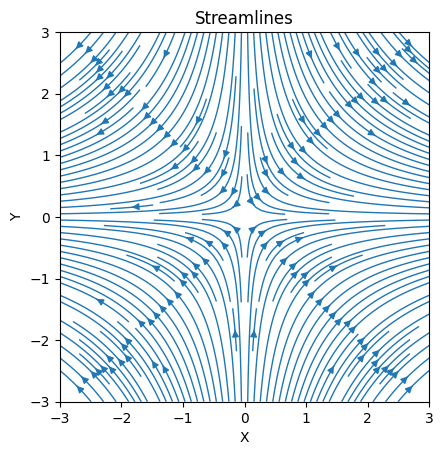

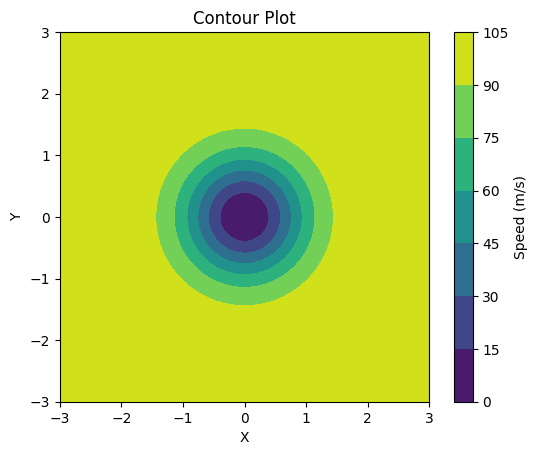

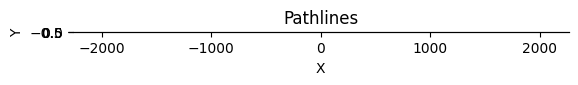

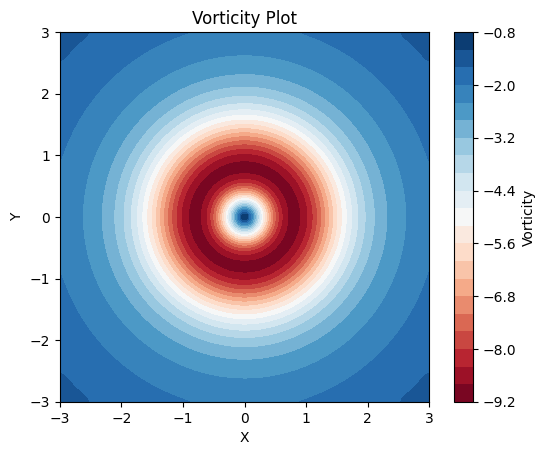

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
Re = 40          # Reynolds number
M = 0.3          # Mach number
D = 1            # Diameter of the cylinder
u = M * 343      # Velocity in m/s (Speed of sound at sea level)
L = D            # Characteristic length
N = 100          # Number of grid points
X, Y = np.meshgrid(np.linspace(-3*L, 3*L, N), np.linspace(-3*L, 3*L, N))
dt = 0.1         # Timestep for pathline integration
T = 20           # Total time for pathline integration
r_cylinder = D / 2 # Radius of the cylinder

# Define velocity field function
def velocity_field(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    u = (1 - np.exp(-r**2)) * np.cos(theta) * M * 343
    v = -(1 - np.exp(-r**2)) * np.sin(theta) * M * 343
    return u, v

# Streamline plot
def streamline_plot():
    u, v = velocity_field(X, Y)
    plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Streamlines')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Contour plot
def contour_plot():
    u, v = velocity_field(X, Y)
    speed = np.sqrt(u**2 + v**2)
    plt.contourf(X, Y, speed, cmap='viridis')
    plt.colorbar(label='Speed (m/s)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Pathline plot
def pathline_plot():
    def pathline_derivatives(r, t):
        x, y = r
        u, v = velocity_field(x, y)
        return [u, v]

    t = np.linspace(0, T, int(T/dt))
    initial_positions = [[r_cylinder * np.cos(theta), r_cylinder * np.sin(theta)] for theta in np.linspace(0, 2*np.pi, 10)]
    for pos in initial_positions:
        path = odeint(pathline_derivatives, pos, t)
        plt.plot(path[:,0], path[:,1], 'b-', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Pathlines')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Vorticity plot
def vorticity_plot():
    x = np.linspace(-3*L, 3*L, N)
    y = np.linspace(-3*L, 3*L, N)
    X, Y = np.meshgrid(x, y)
    u, v = velocity_field(X, Y)
    vorticity = np.gradient(v, axis=0) - np.gradient(u, axis=1)
    plt.contourf(X, Y, vorticity, cmap='RdBu', levels=20)
    plt.colorbar(label='Vorticity')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Vorticity Plot')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Main program
streamline_plot()
contour_plot()
pathline_plot()
vorticity_plot()
